In [1]:
import numpy as np
import pandas as pd

## Principais Estruturas de Dados

- **Séries**; e 
- **DataFrames**.

In [2]:
# criação de um objeto series
s = pd.Series([1, 3, 5, np.nan, 6, 'hello', 'world!'])
s

0         1
1         3
2         5
3       NaN
4         6
5     hello
6    world!
dtype: object

In [3]:
dates = pd.date_range("2023-01-01", periods=6)
dates

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(
    {
        "A": pd.Series(np.random.randn(8), dtype="float16"),
        "B": pd.Series(np.random.randn(8)),
        "C": pd.Series(np.random.randint(0, 255, size=8), dtype="uint8"),  # [0,255] (range of uint8)
    }
)

In [5]:
df

,A,B,C
0,1.785156,0.301407,64
1,0.463867,-0.805937,24
2,-0.082397,0.889976,172
3,1.237305,0.768426,78
4,-0.750000,-0.909232,186
5,1.657227,-1.429747,79
6,-0.493652,-0.273777,130
7,-0.215454,-0.522840,200


In [6]:
# criação de um objeto Dataframe com dados aleatórios
# de 6 linhas e 4 colunas gearados a partir da função
# np.random.randn(m, n)
# As colunas são nomeadas de A, B, C e D
df = pd.DataFrame(np.random.randn(6, 4),index=dates, columns=list("ABCD"))
df

,A,B,C,D
2023-01-01,1.278071,-3.195793,1.906068,-0.686563
2023-01-02,-0.566643,0.643199,-0.527414,1.263253
2023-01-03,0.239780,1.831121,-1.519589,0.048535
2023-01-04,-1.342763,3.041410,0.082253,-0.730959
2023-01-05,0.721487,0.792479,0.631947,-0.047833
2023-01-06,1.227670,-0.831991,0.613382,-0.051107


## Visualizando os Dados

In [7]:
# Por padrão pandas sempre aplica as operações
# realizadas pelo usuário nas linhas e não nas colunas

# head() retorna as n primeiras linhas do DataFame 
df.head(3)

,A,B,C,D
2023-01-01,1.278071,-3.195793,1.906068,-0.686563
2023-01-02,-0.566643,0.643199,-0.527414,1.263253
2023-01-03,0.239780,1.831121,-1.519589,0.048535


In [8]:
# A seleção das primeiras linhas também pode ser feita dessa forma: 
df[:3]

,A,B,C,D
2023-01-01,1.278071,-3.195793,1.906068,-0.686563
2023-01-02,-0.566643,0.643199,-0.527414,1.263253
2023-01-03,0.239780,1.831121,-1.519589,0.048535


In [9]:
# tail() retorna as n últimas linhas do DataFrame
df.tail(4)

,A,B,C,D
2023-01-03,0.239780,1.831121,-1.519589,0.048535
2023-01-04,-1.342763,3.041410,0.082253,-0.730959
2023-01-05,0.721487,0.792479,0.631947,-0.047833
2023-01-06,1.227670,-0.831991,0.613382,-0.051107


In [10]:
# A seleção das últimas linhas também pode ser feita dessa forma:
df[-4:]

,A,B,C,D
2023-01-03,0.239780,1.831121,-1.519589,0.048535
2023-01-04,-1.342763,3.041410,0.082253,-0.730959
2023-01-05,0.721487,0.792479,0.631947,-0.047833
2023-01-06,1.227670,-0.831991,0.613382,-0.051107


In [11]:
# atributo index armazena os nomes dos índices das linhas do DataFrame
df.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
# atributo columns armazena os nomes das colunas do DataFrame
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data.

Note that this can be an expensive operation when **your DataFrame has columns with different data types**, which comes down to a fundamental difference between pandas and NumPy:

<p style='color: red;'> <b>NumPy</b> arrays have one dtype for the entire array, while <b>pandas DataFrames</b> have one dtype per column</p>

In [13]:
df.to_numpy()

array([[ 1.27807143, -3.19579253,  1.90606793, -0.68656345],
       [-0.5666427 ,  0.64319861, -0.52741429,  1.26325326],
       [ 0.23977994,  1.83112118, -1.51958913,  0.04853526],
       [-1.34276317,  3.04141025,  0.08225301, -0.73095856],
       [ 0.72148742,  0.79247914,  0.63194671, -0.04783346],
       [ 1.22767022, -0.83199104,  0.6133823 , -0.05110677]])

In [14]:
# Um pequeno resumo estatístico do conjunto de dados
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.259601,0.380071,0.197774,-0.034112
std,1.042921,2.176395,1.163450,0.721353
min,-1.342763,-3.195793,-1.519589,-0.730959
25%,-0.365037,-0.463194,-0.374997,-0.527699
50%,0.480634,0.717839,0.347818,-0.049470
75%,1.101125,1.571461,0.627306,0.024443
max,1.278071,3.041410,1.906068,1.263253


In [15]:
# transposição de dataframe
df.T

,2023-01-01,2023-01-02,2023-01-03,2023-01-04,2023-01-05,2023-01-06
A,1.278071,-0.566643,0.239780,-1.342763,0.721487,1.227670
B,-3.195793,0.643199,1.831121,3.041410,0.792479,-0.831991
C,1.906068,-0.527414,-1.519589,0.082253,0.631947,0.613382
D,-0.686563,1.263253,0.048535,-0.730959,-0.047833,-0.051107


In [16]:
# ordenação de dataframe pelos nomes dos indices das linhas
df.sort_index(ascending=False)

,A,B,C,D
2023-01-06,1.227670,-0.831991,0.613382,-0.051107
2023-01-05,0.721487,0.792479,0.631947,-0.047833
2023-01-04,-1.342763,3.041410,0.082253,-0.730959
2023-01-03,0.239780,1.831121,-1.519589,0.048535
2023-01-02,-0.566643,0.643199,-0.527414,1.263253
2023-01-01,1.278071,-3.195793,1.906068,-0.686563


In [17]:
# ordenação de dataframe pelos nomes das colunas
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2023-01-01,-0.686563,1.906068,-3.195793,1.278071
2023-01-02,1.263253,-0.527414,0.643199,-0.566643
2023-01-03,0.048535,-1.519589,1.831121,0.239780
2023-01-04,-0.730959,0.082253,3.041410,-1.342763
2023-01-05,-0.047833,0.631947,0.792479,0.721487
2023-01-06,-0.051107,0.613382,-0.831991,1.227670


In [18]:
# ordenação de dataframe por coluna
df.sort_values(by='B')

,A,B,C,D
2023-01-01,1.278071,-3.195793,1.906068,-0.686563
2023-01-06,1.227670,-0.831991,0.613382,-0.051107
2023-01-02,-0.566643,0.643199,-0.527414,1.263253
2023-01-05,0.721487,0.792479,0.631947,-0.047833
2023-01-03,0.239780,1.831121,-1.519589,0.048535
2023-01-04,-1.342763,3.041410,0.082253,-0.730959


## Seleção de Valores no conjunto de dados

While standard Python/NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods:
- DataFrame.at(),
- DataFrame.iat(),
- DataFrame.loc(), and
- DataFrame.iloc().

In [19]:
# Busca por um único valor no dataframe
# ['label_row', 'label_column']
# pd.DataFrame.at??
# pd.DataFrame.iat??

# Busca por um conjunto de valores no dataframe
# ['label_row']
# pd.DataFrame.loc??
# pd.DataFrame.iloc??

### Seleção de Todas as Linhas pelos nomes das Colunas

In [20]:
# retorna uma estrutura de dados do tipo série
df.A

2023-01-01    1.278071
2023-01-02   -0.566643
2023-01-03    0.239780
2023-01-04   -1.342763
2023-01-05    0.721487
2023-01-06    1.227670
Freq: D, Name: A, dtype: float64

In [21]:
# Também pode ser feito dessa forma:
df['A']

2023-01-01    1.278071
2023-01-02   -0.566643
2023-01-03    0.239780
2023-01-04   -1.342763
2023-01-05    0.721487
2023-01-06    1.227670
Freq: D, Name: A, dtype: float64

### Seleção de Quantidade Limitada de Linhas pelos seus Índices

In [22]:
df[0:3]

,A,B,C,D
2023-01-01,1.278071,-3.195793,1.906068,-0.686563
2023-01-02,-0.566643,0.643199,-0.527414,1.263253
2023-01-03,0.239780,1.831121,-1.519589,0.048535


### Seleção de Linha pelo Nome do Índice da Linha

In [23]:
# retorna estrutura de dados Série, pois seleciona apenas uma linha
df.loc[dates[0]]

A    1.278071
B   -3.195793
C    1.906068
D   -0.686563
Name: 2023-01-01 00:00:00, dtype: float64

In [24]:
# retorna DataFrame, pois seleciona múltiplas linhas
df.loc[:, ['A', 'B']]

,A,B
2023-01-01,1.278071,-3.195793
2023-01-02,-0.566643,0.643199
2023-01-03,0.239780,1.831121
2023-01-04,-1.342763,3.041410
2023-01-05,0.721487,0.792479
2023-01-06,1.227670,-0.831991


In [25]:
df.at[dates[0], 'A'] # método para acesso rápido a um valor escalar

1.2780714254107193

### Seleção por Posição em Linha

In [26]:
df.iloc[3]

A   -1.342763
B    3.041410
C    0.082253
D   -0.730959
Name: 2023-01-04 00:00:00, dtype: float64

In [27]:
df.iloc[0:3, 2:4]

,C,D
2023-01-01,1.906068,-0.686563
2023-01-02,-0.527414,1.263253
2023-01-03,-1.519589,0.048535


In [28]:
df.iat[1, 1] # acesso rápido a um valor escalar

0.6431986113224627

### Operações Matemáticas no Conjunto de Dados

In [29]:
# Por padrão as operações são realizadas nos elementos das linhas 
# e individualizados por colunas
df.mean()

A    0.259601
B    0.380071
C    0.197774
D   -0.034112
dtype: float64

In [30]:
# Esse comportamento pode ser alterado, basta inserir o comando
# axis=1 como argumento do comando
df.max(axis=1)

2023-01-01    1.906068
2023-01-02    1.263253
2023-01-03    1.831121
2023-01-04    3.041410
2023-01-05    0.792479
2023-01-06    1.227670
Freq: D, dtype: float64

### Realização de Mesclagem(Merge) de Dataframes

In [31]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.021959,-0.027202,-1.204932,0.298547
1,0.475513,0.028036,-0.293977,-0.343672
2,-0.832573,0.618215,1.642646,0.791418
3,-0.431328,0.599712,-0.602314,-0.506019
4,-1.701176,0.421643,-1.601606,0.517526
5,0.030243,-0.952449,-1.047719,0.838583
6,0.521775,-0.581260,0.363606,0.245351
7,-0.136702,0.532412,-0.174686,-0.253517
8,-2.240491,0.814609,-1.725717,-0.020140
9,0.537765,1.231488,0.265394,-1.159250


In [32]:
pieces = [df[:3], df[3:5], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.021959,-0.027202,-1.204932,0.298547
1,0.475513,0.028036,-0.293977,-0.343672
2,-0.832573,0.618215,1.642646,0.791418
3,-0.431328,0.599712,-0.602314,-0.506019
4,-1.701176,0.421643,-1.601606,0.517526
7,-0.136702,0.532412,-0.174686,-0.253517
8,-2.240491,0.814609,-1.725717,-0.020140
9,0.537765,1.231488,0.265394,-1.159250


Adding a column to a DataFrame is relatively fast. 

However, adding a row requires a copy, and may be expensive.

We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it.

In [33]:
import matplotlib.pyplot as plt

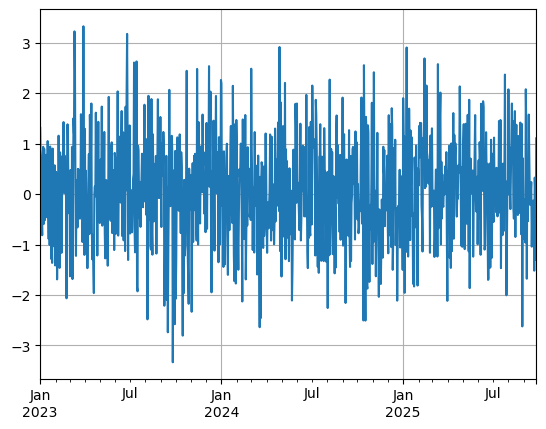

In [34]:
# Dataframe com dados gerados a partir de distribuição de probabilidades normal
# de média 0 e variância 1
ts = pd.Series(np.random.randn(1000), index=pd.date_range("01/01/2023", periods=1000))
# ts = ts.cumsum()
ts.plot(grid=True);

In [35]:
ts

2023-01-01    1.314990
2023-01-02    0.613564
2023-01-03   -0.211774
2023-01-04   -0.458500
2023-01-05   -0.812610
                ...   
2025-09-22   -1.515902
2025-09-23    0.329417
2025-09-24    0.070160
2025-09-25   -1.296494
2025-09-26    1.109121
Freq: D, Length: 1000, dtype: float64

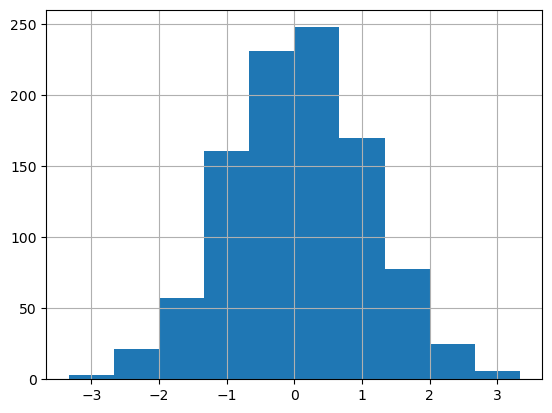

In [36]:
ts.hist();